In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history
from nets.cnn_net.cnn_net import cnn_net

Using TensorFlow backend.


In [2]:
train_path = 'res_still/train'
valid_path = 'res_still/valid'
test_path = 'res_still/test'

batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35))

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 355 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [3]:
model = cnn_net()

In [4]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=355 // batch_size,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=100 // batch_size)

Epoch 1/100
11/11 [==============================] - 7s 638ms/step - loss: 2.9417 - acc: 0.3829 - val_loss: 1.0760 - val_acc: 0.4167
Epoch 2/100
11/11 [==============================] - 6s 577ms/step - loss: 1.0956 - acc: 0.4173 - val_loss: 1.0530 - val_acc: 0.3529
Epoch 3/100
11/11 [==============================] - 6s 550ms/step - loss: 1.0421 - acc: 0.4293 - val_loss: 0.9483 - val_acc: 0.7500
Epoch 4/100
11/11 [==============================] - 6s 528ms/step - loss: 0.9160 - acc: 0.5764 - val_loss: 0.8188 - val_acc: 0.8088
Epoch 5/100
11/11 [==============================] - 6s 585ms/step - loss: 0.7982 - acc: 0.6966 - val_loss: 0.7244 - val_acc: 0.7917
Epoch 6/100
11/11 [==============================] - 6s 588ms/step - loss: 0.6550 - acc: 0.7773 - val_loss: 0.6496 - val_acc: 0.7941
Epoch 7/100
11/11 [==============================] - 6s 528ms/step - loss: 0.6559 - acc: 0.7996 - val_loss: 0.6134 - val_acc: 0.7794
Epoch 8/100
11/11 [==============================] - 6s 563ms/step - 

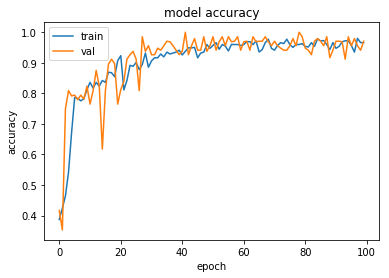

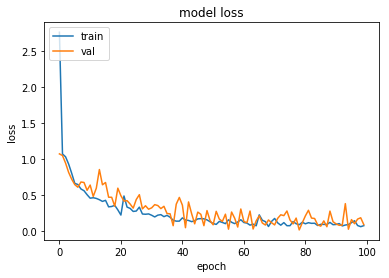

In [5]:
plot_history(history)

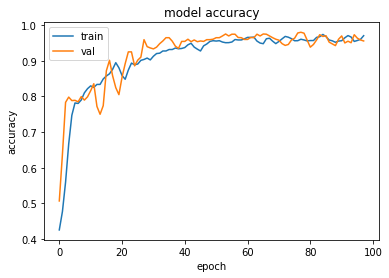

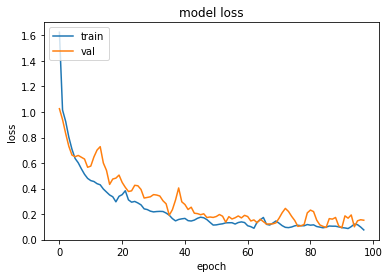

In [6]:
plot_history(history, mean_N=3, save=True, path='nets/cnn_net/', name='plot3')

In [7]:
imgs, labels = next(test_generator)

model.evaluate(imgs,labels, batch_size=batch_size)

32/32 [==============================] - 0s 1ms/step


[0.049394022673368454, 1.0]

In [8]:
# serialize model to JSON
model_json = model.to_json()
with open("nets/cnn_net/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("nets/cnn_net/model.h5")

In [9]:
# load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")
 
# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
__________